<a href="https://www.kaggle.com/code/osamabarakat/learn-python-using-traffic-index-data-sets?scriptVersionId=100015629" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,Rank,City,AverageTCI,MaxTCI
0,1,Lagos,60.16,130.21
1,2,Riga,47.12,87.51
2,3,Mumbai,38.37,153.41
3,4,Tehran,38.20,110.12
4,5,London,38.16,128.50
...,...,...,...,...
63,64,Singapore,5.23,42.93
64,65,Helsinki,4.67,22.43
65,66,Turin,4.29,46.20
66,67,Valencia,3.40,31.97


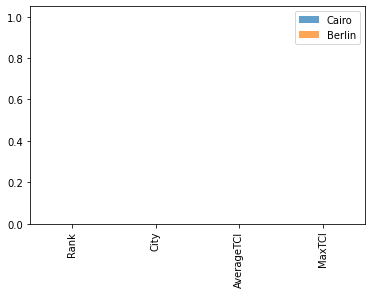

In [1]:
# put print function before any line you want to know output it with out parenthese, But there are some of exceptions
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../input/worldwide-traffic-congestion-ranking/TrafficIndex_19Jun2022-26Jun2022.csv") 

(df["AverageTCI"].mean()) # mean(): funtion used to print average of column
(df["AverageTCI"].max()) # max(): function used to print the maximum value in column
(df["AverageTCI"].min()) # min(): function used to print the minimum value in column

def Quantile1(column):
    return column.quantile(.3)
def Quantile2(column):
    return column.quantile(.3)

(df[["AverageTCI","MaxTCI"]].agg([Quantile1,Quantile2]))


(df["AverageTCI"].cumsum()) # cumsum(): function is used when we want to compute the cumulative sum of array elements over a given axis.
(df["AverageTCI"].cummax()) # cummax(): dataframe.cummin() is used to find the cumulative minimum value over any axis. Each cell is populated with the minimum value seen so far.
(df["AverageTCI"].cummin()) # cummin(): dataframe.cummax() is used to find the cumulative maximum value over any axis. Each cell is populated with the maximum value seen so far.
(df["AverageTCI"].cumprod()) # cumprod(): function is used when we want to compute the cumulative product of array elements over a given axis



unique = (df.drop_duplicates(subset=["AverageTCI","MaxTCI"])) # drop_duplicates(subset=""): using to removing rows that contain a name already listed earlier in the dataset
unique["AverageTCI"].value_counts(sort=True) # value_counts(sort= True or False): To count number of each types , we'll subset the breed column and use the value_counts method. We can also use the sort argument to get the breeds with the biggest counts on top.
unique["MaxTCI"].value_counts(normalize=True) # The normalize argument can be used to turn the counts into proportions of the total



(df[df["AverageTCI"] == 38.20]["MaxTCI"].mean()) #determine any value in any column by calling the name of this column, and equals it by any value in selected column, and calculate the  mean or max or any another thing you want for the row of this value.  
(df.groupby("AverageTCI")["MaxTCI"].mean()) # prompt the mean of MaxTCI sorted by AverageTCI
(df.groupby("AverageTCI")["MaxTCI"].agg([min,max,sum])) # prompt the min,max and sum of MaxTCI sorted by AverageTCI
(df.groupby(["City","AverageTCI"])["MaxTCI"].mean()) # prompt the mean of MaxTCI sorted by City and AverageTCI 
(df.groupby(["City","AverageTCI"])["MaxTCI"].agg([min,max,sum])) # prompt the min,max and sum of MaxTCI sorted by City AverageTCI
(df.groupby(["Rank","City"])["MaxTCI","AverageTCI"].mean()) # prompt the mean of MaxTCI and AverageTCI sorted by Rank and City 
(df.groupby(["Rank","City"])["MaxTCI","AverageTCI"].agg([min,max,sum])) # prompt the min,max and sum of MaxTCI and AverageTCI sorted by Rank and City 
(df.groupby("AverageTCI").agg([np.min,np.max,np.mean,np.median])) # prompt min, max, mean and median for all another column and the AverageTCI is the column main


(df.pivot_table(values="AverageTCI", index="MaxTCI", aggfunc=[np.median,np.mean])) # To making pivot table method  
(df.pivot_table(values="Rank", index="AverageTCI", columns="MaxTCI",fill_value=0, margins=True)) 
# prompt pivot table where MaxTci is Row main and AverageTCI is column main and Rank is the values display in table and you can use fill_value to display any value in the missing values.
# and useing margins to display all valuse that display in pivot table 

soy_1 = df.set_index("Rank") # prompt the table that Rank column is main column
soy_1.reset_index(drop=True) # prompt the last table but the main column is removed that we determain it

(df[df["City"].isin(["Cairo","Berlin"])]) # select column and determine values we want to display information about this values
(soy_1.loc[[41,5]]) # select two values from the column that we will select it in soy_1 and print the information about this values

(soy_1.loc[6]) # print info about special value in Ranl colnum that we selct it in soy_1
soy_2 = df.set_index(["City","Rank"]) # prompt the table that City column and Rank column are main columns
(soy_2)

(soy_2.loc[["Cairo","Berlin"]]) # From soy_2 we display specific information about the values in the city column
(soy_2.loc[[("Cairo",14),("Berlin",32)]]) # in case the main column (City) have many attributes in another main column we can use this code to select the specified value from this attribute

soy_3 = df.sort_index() 
(soy_3.sort_index(level=["City","AverageTCI"], ascending=[True])) # Sort df by ascending City then descending AverageTCI.

soy_4 = (df.set_index(["City","MaxTCI"]).sort_index()) # prompt dataframe sorted by Cit and MacTCI
(soy_4.loc["Ahmedabad": "Athens"]) # sclice row at the outer level of an index form soy_4
(soy_4.loc[("Amsterdam",37.29):("Athens",136.62)]) # if you want to slicing first and last position from soy_4 you choose the argument value from first column and it's corresponding value from another column.
# Note: You can't get second position from soy_4 if you want to summon it, you have to use first position with it
(soy_4.loc[:,"City":"MaxTCI"]) # slicing columns from City to MaxTCI
soy_4.loc[("Amsterdam",6.74):("Athens",19.27),:"Rank"] # sclicng row and columns in same time 
(df.iloc[2:4,1:3]) # slice dataframe by row or column number using the loc method, Here it print second and third row and first , second column
# Slice rows with code like df.loc[("a", "b"):("c", "d")].
# Slice columns with code like df.loc[:, "e":"f"].
# Slice both ways with code like df.loc[("a", "b"):("c", "d"), "e":"f"].

soy_5 = df.pivot_table(values="AverageTCI", index="City", columns ="MaxTCI")
(soy_5.loc["Warsaw":"Zaragoza"])
soy_5.mean(axis="index")

#(df["AverageTCI"].hist(bins=11)) #display hist of AverageTCI, bins: is used to adjust the number of bars
#(df.plot(kind="bar", title="Traffic")) # display that all dataframe as hist and legend every one by spical color
#(df.plot(x="AverageTCI", y ="MaxTCI", kind="line", color="green", rot=45)) # rot:used to rotate the x-axis labels
# kind = (line - scatter )
# scatter is good  for visualizing relationships between two numeric variables
df[df["City"]=="Cairo"]["MaxTCI"].hist(alpha=0.7)  # alpha making the histgram translucent
df[df["City"]=="Berlin"]["MaxTCI"].hist(alpha=0.7)
plt.legend(["Cairo","Berlin"])


df.isna() # to find any missing values at body table
df.isna().any() # to find any missing values column
df.isna().sum() # to find any total missing values
df.isna().sum().plot(kind="bar") #  to visualize the missing values in the data sets
df.dropna() # remove any rows contain missing value
df.fillna(0) # repace the any missing value by Zero


















# print() 
#print(df)
#plt.legend()
# plt.show()